In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('datasets/indian_liver_patient.csv')
df.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Proteins,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [3]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 583 rows and 11 columns


In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df.dropna(inplace=True)
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 579 rows and 11 columns


In [6]:
df.rename(columns={'Dataset': 'Liver_Disease'}, inplace=True)
df.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Proteins,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [7]:
df.Liver_Disease.value_counts()

1    414
2    165
Name: Liver_Disease, dtype: int64

In [8]:
df.Liver_Disease.replace({2: 0}, inplace=True)
df.sample(10).T

,267,469,494,230,445,338,474,146,119,450
Age,43,66,25,61,17,75,35,66,32,65
Gender,Female,Male,Male,Male,Male,Male,Male,Female,Male,Male
Total_Bilirubin,0.9,0.8,0.7,1.5,0.9,1.8,2.0,2.9,18.0,7.9
Direct_Bilirubin,0.3,0.2,0.2,0.6,0.2,0.8,1.1,1.3,8.2,4.3
Alkaline_Phosphotase,140,165,185,196,279,405,226,168,298,282
Alamine_Aminotransferase,12,22,196,61,40,79,33,21,1250,50
Aspartate_Aminotransferase,29,32,401,85,46,50,135,38,1050,72
Total_Proteins,7.4,4.4,6.5,6.7,7.3,6.1,6.0,5.5,5.4,6.0
Albumin,3.5,2.0,3.9,3.8,4.0,2.9,2.7,1.8,2.6,3.0
Albumin_and_Globulin_Ratio,1.8,0.8,1.5,1.3,1.2,0.9,0.8,0.4,0.9,1.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,579.0,44.782383,16.221786,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,579.0,3.315371,6.227716,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,579.0,1.494128,2.816499,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,579.0,291.366149,243.561863,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,579.0,81.126079,183.182845,10.0,23.0,35.00,61.0,2000.0
Aspartate_Aminotransferase,579.0,110.414508,289.850034,10.0,25.0,42.00,87.0,4929.0
Total_Proteins,579.0,6.481693,1.084641,2.7,5.8,6.60,7.2,9.6
Albumin,579.0,3.138515,0.794435,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Liver_Disease,579.0,0.715026,0.451792,0.0,0.0,1.00,1.0,1.0


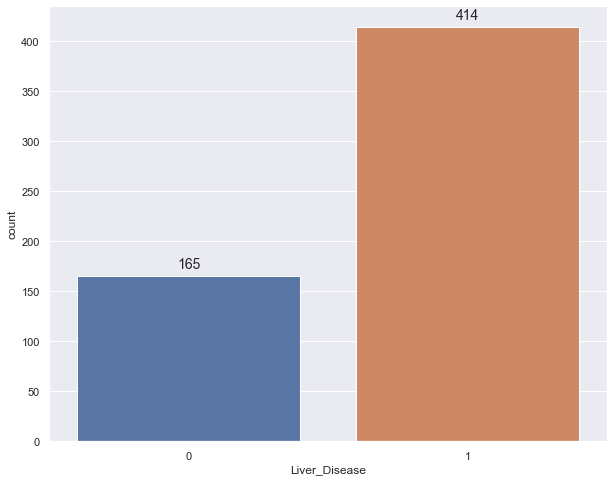

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='Liver_Disease', data=df)
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, height, ha='center', va='bottom', fontsize=14)
plt.show();

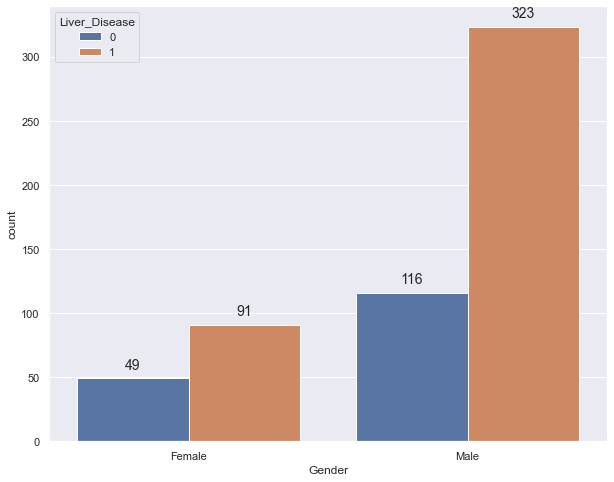

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='Gender', data=df, hue='Liver_Disease')
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, height, ha='center', va='bottom', fontsize=14)
plt.show();

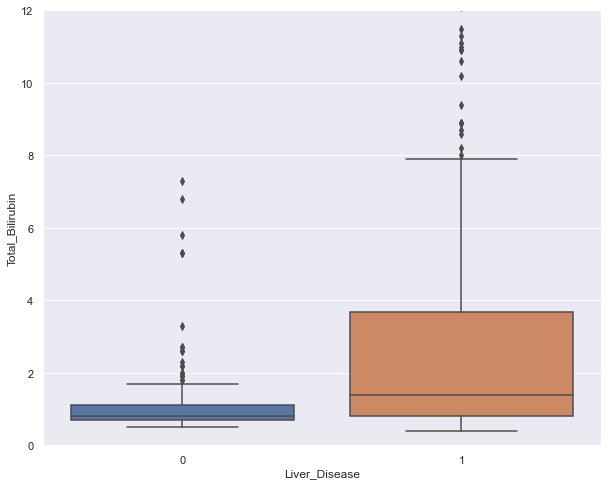

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Liver_Disease', y='Total_Bilirubin', data=df)
plt.ylim(0, 12)
plt.show();

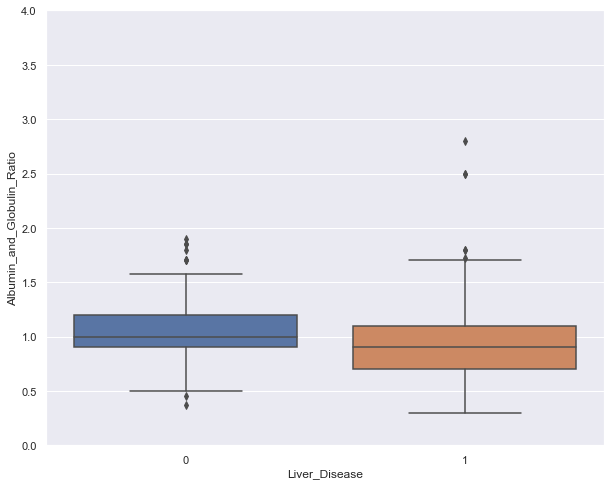

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Liver_Disease', y='Albumin_and_Globulin_Ratio', data=df)
plt.ylim(0, 4)
plt.show();

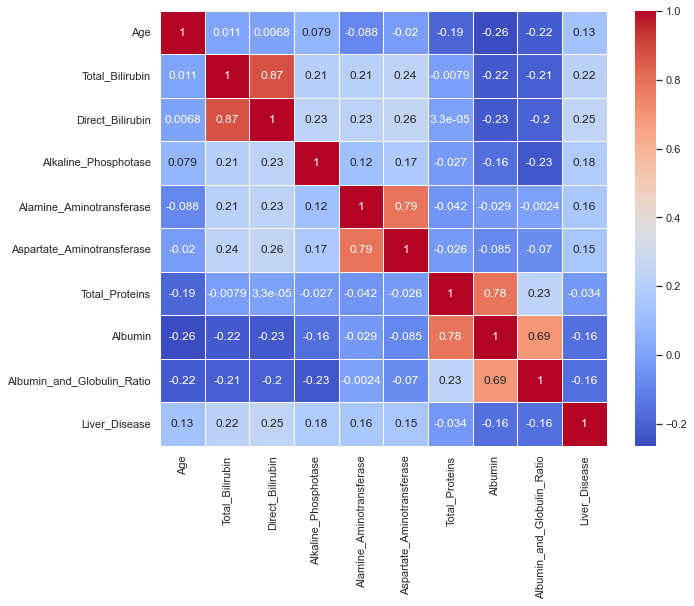

In [14]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show();

In [15]:
label_enc = preprocessing.LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'].astype(str))
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [16]:
df.to_csv('datasets/indian_liver_patient_processed.csv', index=False)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [19]:
# Removing highly correlated features
X = df.drop(columns=['Liver_Disease',
                    'Direct_Bilirubin',
                    'Alamine_Aminotransferase',
                    'Albumin'])
y = df['Liver_Disease']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((463, 7), (116, 7), (463,), (116,))

In [27]:
X_train_num = X_train.drop(columns=['Gender'])
X_test_num = X_test.drop(columns=['Gender'])

In [28]:
scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train_num), columns=X_train_num.columns)
X_test_num = pd.DataFrame(scaler.transform(X_test_num), columns=X_test_num.columns)

In [29]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,463.0,2.292383e-16,1.001082,-2.542329,-0.776429,0.043453,0.737199,2.566167
Total_Bilirubin,463.0,2.937415e-17,1.001082,-0.474249,-0.413747,-0.383496,-0.126362,10.809390
Alkaline_Phosphotase,463.0,6.042683e-17,1.001082,-0.958300,-0.481298,-0.339257,0.038105,7.721029
Aspartate_Aminotransferase,463.0,-3.464951e-17,1.001082,-0.338882,-0.294598,-0.240824,-0.095319,15.217569
Total_Proteins,463.0,3.425386e-16,1.001082,-3.502681,-0.654297,0.080770,0.632070,2.837271
Albumin_and_Globulin_Ratio,463.0,-4.205899e-16,1.001082,-2.000016,-0.761873,0.011967,0.476271,5.738380


In [30]:
X_test_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,116.0,0.148385,1.103110,-2.542329,-0.524158,0.138055,0.989471,2.881506
Total_Bilirubin,116.0,-0.166131,0.641388,-0.459123,-0.428872,-0.398621,-0.232240,3.579391
Alkaline_Phosphotase,116.0,0.049802,1.154195,-0.907420,-0.482358,-0.354097,0.019025,5.643417
Aspartate_Aminotransferase,116.0,-0.121878,0.432288,-0.342046,-0.292226,-0.247151,-0.138812,2.947647
Total_Proteins,116.0,-0.139433,0.974806,-2.675731,-0.861034,-0.286763,0.632070,1.918437
Albumin_and_Globulin_Ratio,116.0,0.014369,0.944656,-1.783341,-0.761873,-0.142801,0.739376,2.643022


In [31]:
X_train_categorical = X_train[['Gender']]
X_test_categorical = X_test[['Gender']]

X_train_categorical.reset_index(drop=True, inplace=True)
X_train_num.reset_index(drop=True, inplace=True)

X_train = pd.concat([X_train_categorical, X_train_num], axis=1)

X_train.head()

,Gender,Age,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Proteins,Albumin_and_Globulin_Ratio
0,0,-0.965633,-0.428872,-0.538538,-0.243987,-1.205597,-0.142801
1,0,0.611063,0.297153,0.258587,-0.240824,0.448304,-0.452337
2,1,-0.776429,1.870207,-0.038215,4.687389,-0.838064,0.166735
3,1,-2.037786,-0.413747,0.055065,-0.161745,0.172653,0.476271
4,1,0.863335,-0.413747,-0.703899,-0.221845,-0.470530,0.166735


In [32]:
X_test_categorical.reset_index(drop=True, inplace=True)
X_test_num.reset_index(drop=True, inplace=True)

X_test = pd.concat([X_test_categorical, X_test_num], axis=1)

X_test.head()

,Gender,Age,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Proteins,Albumin_and_Globulin_Ratio
0,1,1.304810,-0.368370,-0.131496,-0.247151,0.448304,0.785807
1,1,-0.271886,-0.005358,0.038105,0.258956,0.540187,-0.142801
2,0,-0.398022,-0.443998,-0.525818,-0.266130,-0.562414,-0.142801
3,1,1.367878,-0.413747,-0.525818,-0.272456,-1.940664,-0.452337
4,0,1.557081,-0.413747,-0.606378,-0.152256,1.734671,1.404878


In [33]:
def build_model(clf, X_train, y_train, X_test, y_test):

    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

In [37]:
def performance_metrics_report(report_log):

    for key in report_log:
        print('*' * 50)
        print(f'Classifier: {key}')
        print('*' * 50)
        for score in report_log[key]:
            print(f'{score}: {report_log[key][score]}')

In [38]:
report_log = {}
report_log['Logistic Regression'] = build_model(LogisticRegression(), X_train, y_train, X_test, y_test)
report_log['K-Nearest Neighbors'] = build_model(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
report_log['Support Vector Machine'] = build_model(SVC(), X_train, y_train, X_test, y_test)
report_log['Random Forest'] = build_model(RandomForestClassifier(), X_train, y_train, X_test, y_test)
report_log['Stochastic Gradient Descent'] = build_model(SGDClassifier(), X_train, y_train, X_test, y_test)
performance_metrics_report(report_log)

**************************************************
Classifier: Logistic Regression
**************************************************
Accuracy: 0.6551724137931034
Precision: 0.6486486486486487
Recall: 0.9863013698630136
**************************************************
Classifier: K-Nearest Neighbors
**************************************************
Accuracy: 0.603448275862069
Precision: 0.6451612903225806
Recall: 0.821917808219178
**************************************************
Classifier: Support Vector Machine
**************************************************
Accuracy: 0.6293103448275862
Precision: 0.6293103448275862
Recall: 1.0
**************************************************
Classifier: Random Forest
**************************************************
Accuracy: 0.6293103448275862
Precision: 0.65
Recall: 0.8904109589041096
**************************************************
Classifier: Stochastic Gradient Descent
**************************************************
Accuracy: 0.